<a href="https://colab.research.google.com/github/kdemertzis/TS_demer/blob/main/Fed_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd

# Number of samples for each individual training set
num_samples = 1000

# Generate individual training sets
np.random.seed(0)
X_train1 = np.random.normal(0, 1, (num_samples, 5))
y_train1 = np.sum(X_train1, axis=1)

np.random.seed(1)
X_train2 = np.random.normal(1, 2, (num_samples, 5))
y_train2 = np.sum(X_train2, axis=1)

np.random.seed(2)
X_train3 = np.random.normal(2, 3, (num_samples, 5))
y_train3 = np.sum(X_train3, axis=1)

# Combine individual training sets into one dataset
X_train = np.concatenate((X_train1, X_train2, X_train3), axis=0)
y_train = np.concatenate((y_train1, y_train2, y_train3), axis=0)

# Save the combined dataset as a pandas dataframe
df = pd.DataFrame(np.hstack((X_train, y_train.reshape(-1,1))))
df.to_csv('network_traffic_dataset.csv', index=False, header=False)


In [4]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Generate synthetic datasets for individual nodes
num_samples = 1000
np.random.seed(0)
X_train1 = np.random.normal(0, 1, (num_samples, 5))
y_train1 = np.sum(X_train1, axis=1)

np.random.seed(1)
X_train2 = np.random.normal(1, 2, (num_samples, 5))
y_train2 = np.sum(X_train2, axis=1)

np.random.seed(2)
X_train3 = np.random.normal(2, 3, (num_samples, 5))
y_train3 = np.sum(X_train3, axis=1)

# Train individual models on each node
model1 = LinearRegression()
model1.fit(X_train1, y_train1)

model2 = LinearRegression()
model2.fit(X_train2, y_train2)

model3 = LinearRegression()
model3.fit(X_train3, y_train3)

# Federated aggregation
coefs = [model.coef_ for model in [model1, model2, model3]]
intercepts = [model.intercept_ for model in [model1, model2, model3]]

updated_coef = np.mean(coefs, axis=0)
updated_intercept = np.mean(intercepts, axis=0)

updated_model = LinearRegression(fit_intercept=False)
updated_model.coef_ = updated_coef
updated_model.intercept_ = updated_intercept


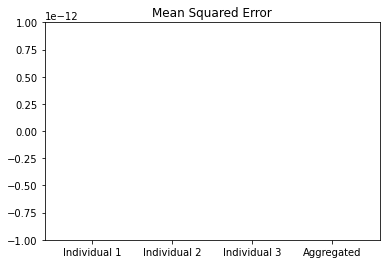

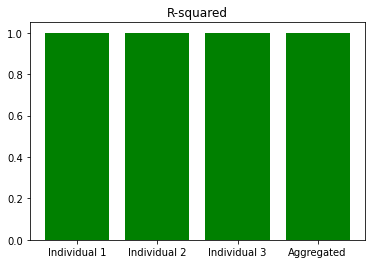

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Generate synthetic datasets for individual nodes
num_samples = 1000
np.random.seed(0)
X_train1 = np.random.normal(0, 1, (num_samples, 5))
y_train1 = np.sum(X_train1, axis=1)

np.random.seed(1)
X_train2 = np.random.normal(1, 2, (num_samples, 5))
y_train2 = np.sum(X_train2, axis=1)

np.random.seed(2)
X_train3 = np.random.normal(2, 3, (num_samples, 5))
y_train3 = np.sum(X_train3, axis=1)

# Train individual models on each node
model1 = LinearRegression()
model1.fit(X_train1, y_train1)

model2 = LinearRegression()
model2.fit(X_train2, y_train2)

model3 = LinearRegression()
model3.fit(X_train3, y_train3)

# Evaluate performance of individual models
y_pred1 = model1.predict(X_train1)
mse1 = mean_squared_error(y_train1, y_pred1)
r2_1 = r2_score(y_train1, y_pred1)

y_pred2 = model2.predict(X_train2)
mse2 = mean_squared_error(y_train2, y_pred2)
r2_2 = r2_score(y_train2, y_pred2)

y_pred3 = model3.predict(X_train3)
mse3 = mean_squared_error(y_train3, y_pred3)
r2_3 = r2_score(y_train3, y_pred3)

# Federated aggregation
coefs = [model.coef_ for model in [model1, model2, model3]]
intercepts = [model.intercept_ for model in [model1, model2, model3]]

updated_coef = np.mean(coefs, axis=0)
updated_intercept = np.mean(intercepts, axis=0)

updated_model = LinearRegression(fit_intercept=False)
updated_model.coef_ = updated_coef
updated_model.intercept_ = updated_intercept

# Evaluate performance of aggregated model
y_pred_aggregated = updated_model.predict(X_train1)
mse_aggregated = mean_squared_error(y_train1, y_pred_aggregated)
r2_aggregated = r2_score(y_train1, y_pred_aggregated)

# Plot performance metrics
plt.bar(['Individual 1', 'Individual 2', 'Individual 3', 'Aggregated'], [mse1, mse2, mse3, mse_aggregated], color='b')
plt.title("Mean Squared Error")
plt.show()

plt.bar(['Individual 1', 'Individual 2', 'Individual 3', 'Aggregated'], [r2_1, r2_2, r2_3, r2_aggregated], color='g')
plt.title("R-squared")
plt.show()


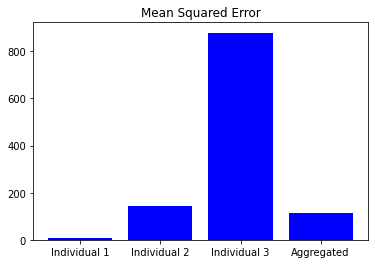

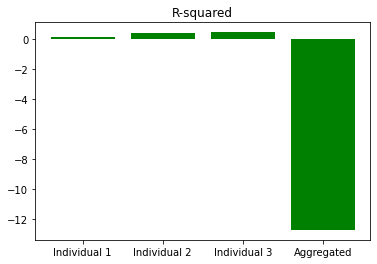

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Generate synthetic datasets for individual nodes
num_samples = 1000
np.random.seed(0)
X_train1 = np.random.normal(0, 1, (num_samples, 5))
y_train1 = np.sum(X_train1**2, axis=1) + np.sin(X_train1[:,0]) + np.cos(X_train1[:,1]) + np.sin(X_train1[:,2]) + np.cos(X_train1[:,3]) + np.sin(X_train1[:,4])

np.random.seed(1)
X_train2 = np.random.normal(1, 2, (num_samples, 5))
y_train2 = np.sum(X_train2**2, axis=1) + np.sin(X_train2[:,0]) + np.cos(X_train2[:,1]) + np.sin(X_train2[:,2]) + np.cos(X_train2[:,3]) + np.sin(X_train2[:,4])

np.random.seed(2)
X_train3 = np.random.normal(2, 3, (num_samples, 5))
y_train3 = np.sum(X_train3**2, axis=1) + np.sin(X_train3[:,0]) + np.cos(X_train3[:,1]) + np.sin(X_train3[:,2]) + np.cos(X_train3[:,3]) + np.sin(X_train3[:,4])

# Train individual models on each node
model1 = LinearRegression()
model1.fit(X_train1, y_train1)

model2 = LinearRegression()
model2.fit(X_train2, y_train2)

model3 = LinearRegression()
model3.fit(X_train3, y_train3)

# Evaluate performance of individual models
y_pred1 = model1.predict(X_train1)
mse1 = mean_squared_error(y_train1, y_pred1)
r2_1 = r2_score(y_train1, y_pred1)

y_pred2 = model2.predict(X_train2)
mse2 = mean_squared_error(y_train2, y_pred2)
r2_2 = r2_score(y_train2, y_pred2)

y_pred3 = model3.predict(X_train3)
mse3 = mean_squared_error(y_train3, y_pred3)
r2_3 = r2_score(y_train3, y_pred3)

# Federated aggregation
coefs = [model.coef_ for model in [model1, model2, model3]]
intercepts = [model.intercept_ for model in [model1, model2, model3]]
updated_coef = np.mean(coefs, axis=0)
updated_intercept = np.mean(intercepts, axis=0)

# Create an updated federated model using the aggregated coefficients and intercepts
updated_model = LinearRegression(fit_intercept=False)
updated_model.coef_ = updated_coef
updated_model.intercept_ = updated_intercept

# Evaluate the performance of the aggregated model by predicting the output on the first node's training data
y_pred_aggregated = updated_model.predict(X_train1)
mse_aggregated = mean_squared_error(y_train1, y_pred_aggregated)
r2_aggregated = r2_score(y_train1, y_pred_aggregated)

# Plot the performance metrics for each individual model and the final federated model
plt.bar(['Individual 1', 'Individual 2', 'Individual 3', 'Aggregated'], [mse1, mse2, mse3, mse_aggregated], color='b')
plt.title("Mean Squared Error")
plt.show()

plt.bar(['Individual 1', 'Individual 2', 'Individual 3', 'Aggregated'], [r2_1, r2_2, r2_3, r2_aggregated], color='g')
plt.title("R-squared")
plt.show()
